In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.api import qqplot
import statsmodels.api as sm

from sklearn.cross_validation import train_test_split

%matplotlib inline

In [15]:
fields = ['Fecha Hora', 'Velocidad Viento']

data = pd.read_csv('../data/meteorologia.csv', usecols=fields,index_col="Fecha Hora",squeeze=True)
data.index = pd.to_datetime(data.index,format="%d-%m-%Y %H:%M")

In [20]:
n = len(data)
X_train = data[:int(n*.8)]
X_test = data[int(n*.8):]

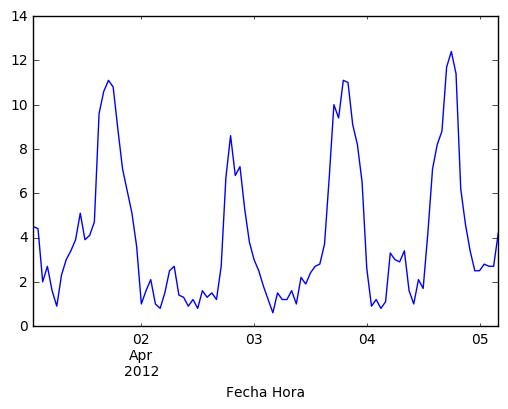

In [29]:
X_train[:100].plot()

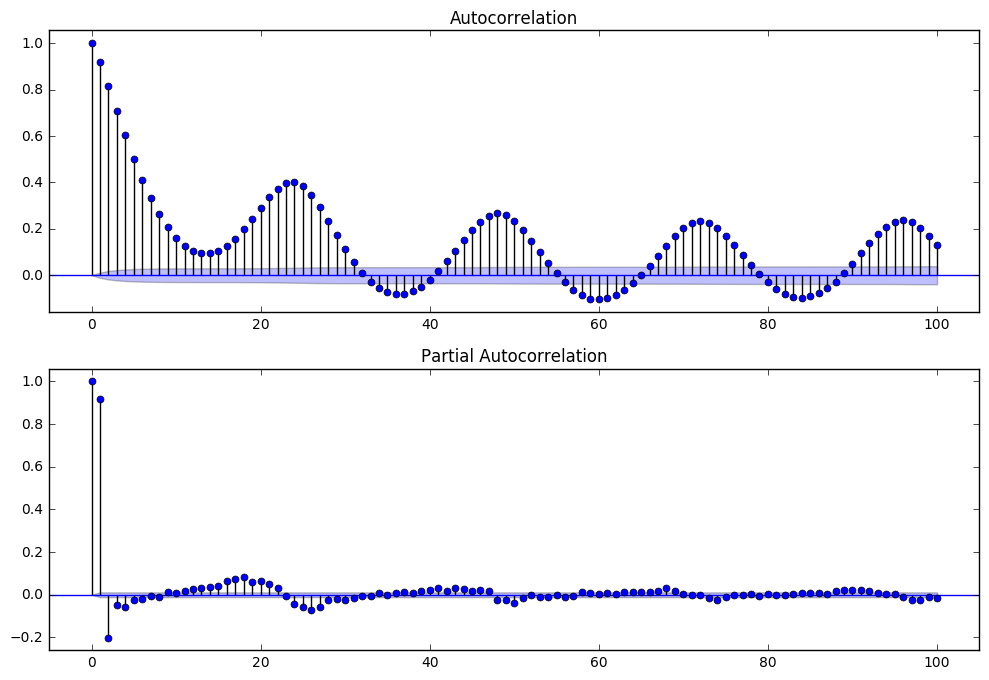

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(X_train.values.squeeze(), lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(X_train, lags=100, ax=ax2)

In [32]:
print(sm.tsa.adfuller(X_train))

(-18.431098555623823, 2.1685205444365493e-30, 50, 31101, {'5%': -2.8616329370817177, '1%': -3.4305602774768502, '10%': -2.5668194675514817}, 98135.455846264987)


const                     4.033024
ar.L1.Velocidad Viento    1.104859
ar.L2.Velocidad Viento   -0.201086
dtype: float64
100158.44270642057 100191.829241 100169.135996


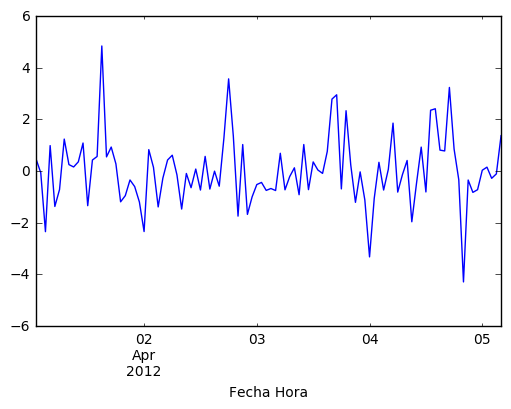

In [67]:
AR = sm.tsa.ARIMA(X_train,order=(2,0,0)).fit()
print(AR.params)
print(AR.aic,AR.bic,AR.hqic)
AR.resid[:100].plot()

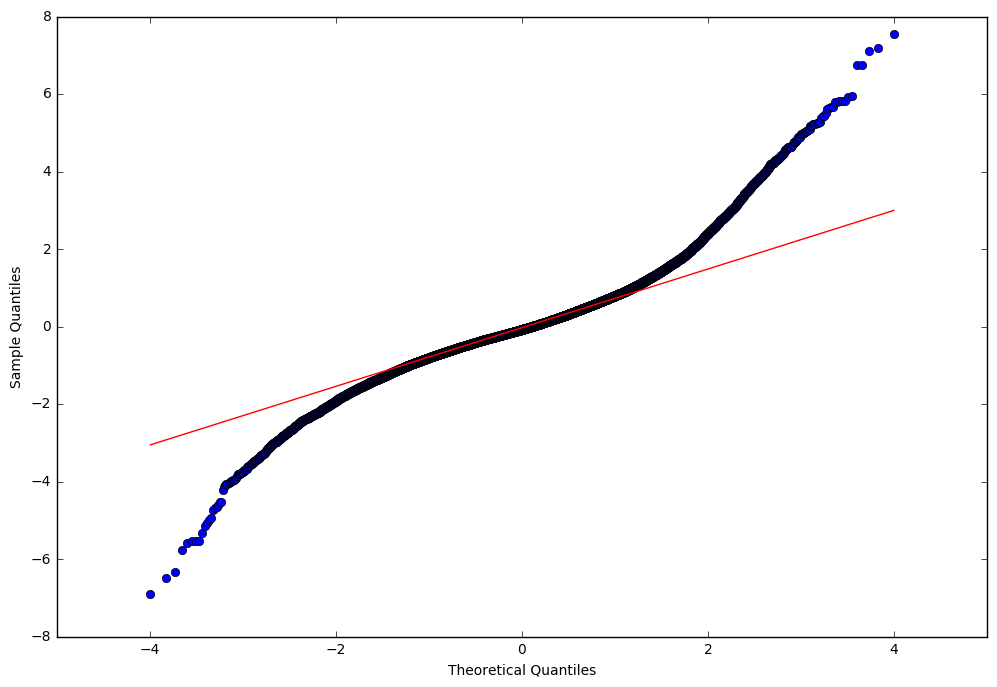

In [68]:
resid = AR.resid
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [58]:
start = X_test.index[5]
end = X_test.index[10]

In [59]:
MA.predict(start,end,dynamic=True)

ValueError: There is no frequency for these dates and date 2016-01-20 15:00:00 is not in dates index. Try giving a date that is in the dates index or use an integer